<a href="https://colab.research.google.com/github/Gkcoli/CCMACLRL_EXERCISES_COM222-ML/blob/main/Copy_of_Exercise8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 8: Create your own personal face recognition using SVM

In [196]:
pip install numpy opencv-python scikit-learn

## Import libraries

In [197]:
import os
import cv2
import numpy as np
from PIL import Image  # PIL is used to load the image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## Mount Google Drive

In [198]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Display a single image from your drive

In [199]:
# put your answer here
def displayImage(image_path):
  # Path to your image file in Google Drive
  image = Image.open(image_path)

  # Display the image using matplotlib
  plt.imshow(image)
  plt.axis('on')  # Hide axes for cleaner display
  plt.show()

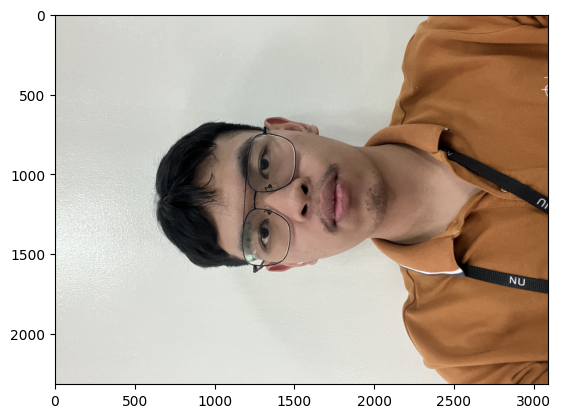

In [200]:
displayImage('/content/drive/My Drive/Images/Train/Coli/IMG_5748.JPG')


In [201]:
def load_images_from_folder(folder):
    images = []
    labels = []
    for label, person in enumerate(os.listdir(folder)):
        person_folder = os.path.join(folder, person)
        person_name = os.path.basename(person_folder)
        for filename in os.listdir(person_folder):
            img_path = os.path.join(person_folder, filename)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
            img = cv2.resize(img, (100, 100))  # Resize to 100x100 pixels
            images.append(img.flatten())  # Flatten the image
            labels.append(person_name)
    return np.array(images), np.array(labels)

images, labels = load_images_from_folder('/content/drive/My Drive/Images/Train')

In [202]:
images.shape

(150, 10000)

In [203]:
labels.shape

(150,)

In [204]:
labels

array(['Blix', 'Blix', 'Blix', 'Blix', 'Blix', 'Blix', 'Blix', 'Blix',
       'Blix', 'Blix', 'Blix', 'Blix', 'Blix', 'Blix', 'Blix', 'Blix',
       'Blix', 'Blix', 'Blix', 'Blix', 'Blix', 'Blix', 'Blix', 'Blix',
       'Blix', 'Blix', 'Blix', 'Blix', 'Blix', 'Blix', 'Blix', 'Blix',
       'Blix', 'Blix', 'Blix', 'Blix', 'Blix', 'Blix', 'Blix', 'Blix',
       'Blix', 'Blix', 'Blix', 'Blix', 'Blix', 'Blix', 'Blix', 'Blix',
       'Blix', 'Blix', 'Rodney', 'Rodney', 'Rodney', 'Rodney', 'Rodney',
       'Rodney', 'Rodney', 'Rodney', 'Rodney', 'Rodney', 'Rodney',
       'Rodney', 'Rodney', 'Rodney', 'Rodney', 'Rodney', 'Rodney',
       'Rodney', 'Rodney', 'Rodney', 'Rodney', 'Rodney', 'Rodney',
       'Rodney', 'Rodney', 'Rodney', 'Rodney', 'Rodney', 'Rodney',
       'Rodney', 'Rodney', 'Rodney', 'Rodney', 'Rodney', 'Rodney',
       'Rodney', 'Rodney', 'Rodney', 'Rodney', 'Rodney', 'Rodney',
       'Rodney', 'Rodney', 'Rodney', 'Rodney', 'Rodney', 'Rodney',
       'Rodney', 'Rodney', 'Rodn

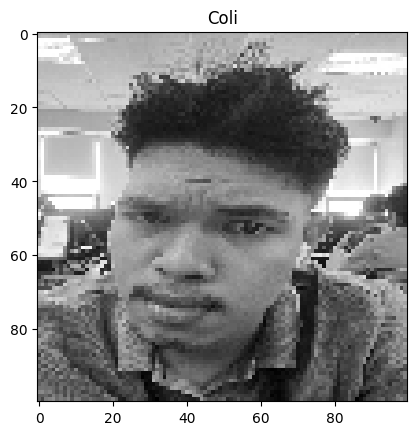

In [205]:
# Get a sample image and its corresponding name
image = images[-1].reshape(100,100)  # Access the first image
name = labels[-1]  # Get the name corresponding to the image

# Display the image
plt.imshow(image, cmap="gray")
plt.title(name)
plt.axis('on')  # Hide axes
plt.show()


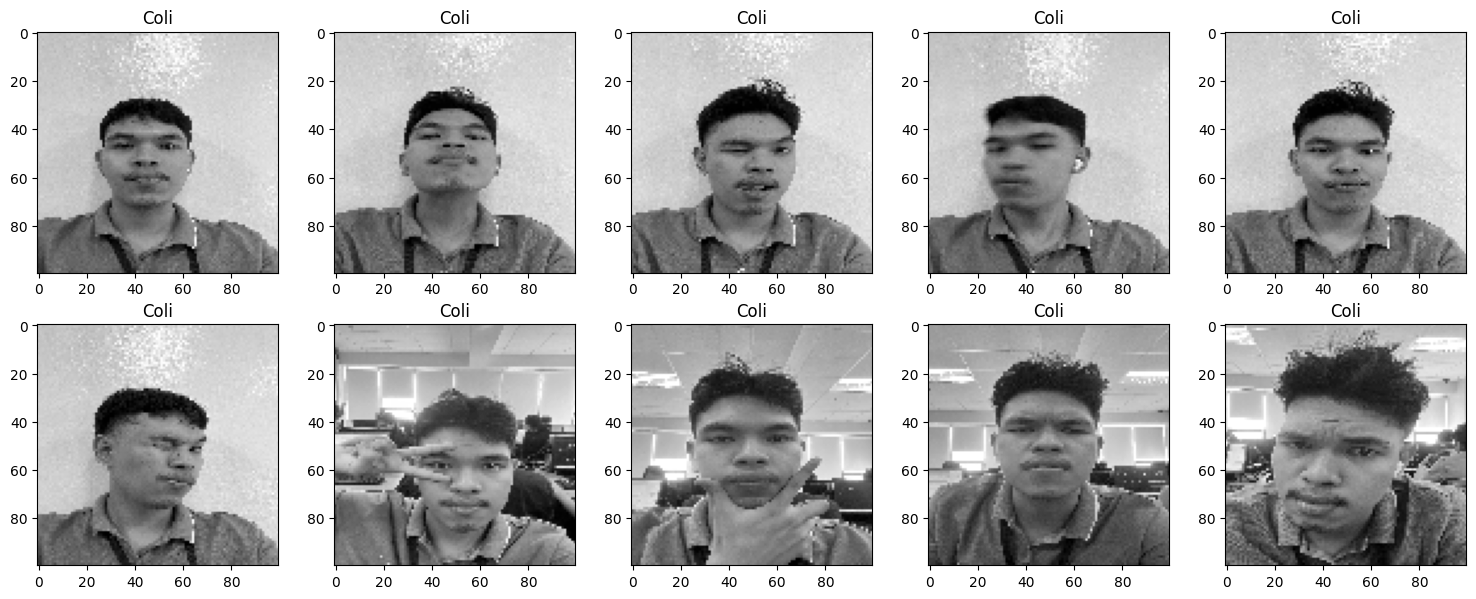

In [206]:
num_faces = 10

fig, axes = plt.subplots(2, 5, figsize=(15, 6))  # 2 rows and 5 columns
axes = axes.flatten()  # Flatten the array of axes for easy indexing

# Loop to display the last ten images and corresponding labels
for i in range(num_faces):
    image = images[-num_faces + i].reshape(100, 100)  # Access the i-th last image
    name = labels[-num_faces + i]  # Get the name corresponding to the i-th last image

    axes[i].imshow(image, cmap='gray')  # Show the image
    axes[i].set_title(name)  # Set the title to the name
    axes[i].axis('on')  # Display axes

# Adjust layout
plt.tight_layout()
plt.show()


## Split your data

In [207]:
# put your answer here
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

## Train your SVM model

In [208]:
# put your answer here
from sklearn import svm

model = svm.SVC(gamma='scale')  # You can choose different kernels like 'linear', 'rbf', etc.
model.fit(X_train, y_train) #kulang pa ata data mo, gawa 0.2 yung test size mo

SVC()

## Evaluate your model

In [209]:
# put your answer here
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Precision: {precision:4f}")
print(f"Recall: {recall:4f}")
print(f"F1 Score: {f1:4f}")
print(f"Accuracy: {accuracy * 100:.2f}%")

Precision: 1.000000
Recall: 1.000000
F1 Score: 1.000000
Accuracy: 100.00%


## Test your model using images not in your training set

In [210]:
# put your answer here
def predict_image(image_path, model):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (100, 100)).flatten().reshape(1, -1)
    prediction = model.predict(img)
    return prediction



Predicted label: ['Rodney']


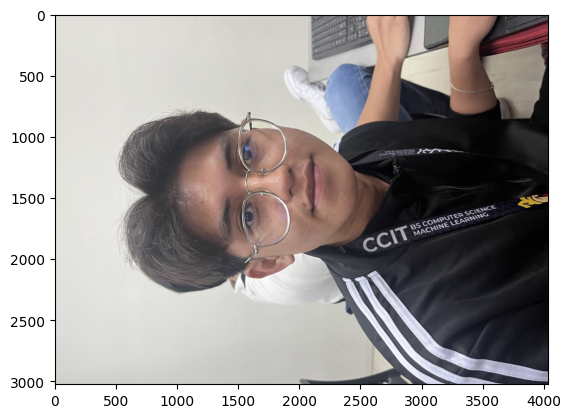

In [211]:
 img_path = '/content/drive/My Drive/Images/Test/Rodney_1.JPG'
 result = predict_image(img_path, model)
 print(f'Predicted label:', result)
 displayImage(img_path)

Predicted label: ['Blix']


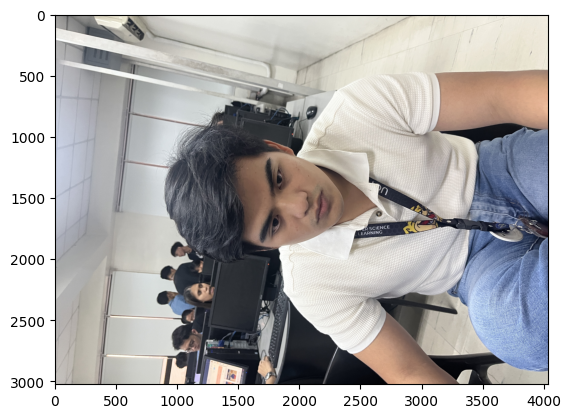

In [212]:
 img_path = '/content/drive/My Drive/Images/Test/Blix_1.JPG'
 result = predict_image(img_path, model)
 print(f'Predicted label:', result)
 displayImage(img_path)

Predicted label: ['Coli']


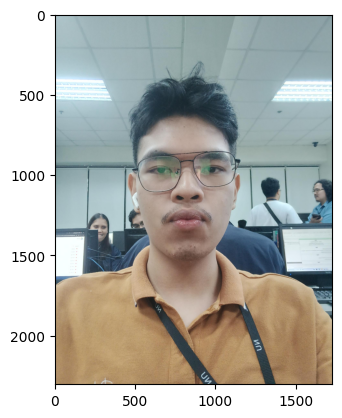

In [214]:
 img_path = '/content/drive/My Drive/Images/Test/Coli.jpg'
 result = predict_image(img_path, model)
 print(f'Predicted label:', result)
 displayImage(img_path)